# Prévoir un Y quali (classifier) => logistique

## Table des matières

1. [Arbre de décision](#add)
2. [Forêt](#for)
3. [SVC](#svc)
4. [Gradient Boosting](#gb)

# Arbre de décision <a class="anchor" id="add"></a>

In [5]:
# Commencer par importer le jeu de données : Utiliser **pandas** et la fonction **read_csv**

import pandas as pd

fish = pd.read_csv("Fish.csv", sep = ',') 
y = fish['Species']
x = fish.iloc[:,1:7]

In [6]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [21]:
## Lancer la construction d'un arbre de décision sur **election** et **fish**:
#- Pour le modèle utiliser la fonction **DecisionTreeClassifier** en fonction du type de vos données


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf = tree.DecisionTreeClassifier()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 
clf.fit(x_train, y_train)

DecisionTreeClassifier()

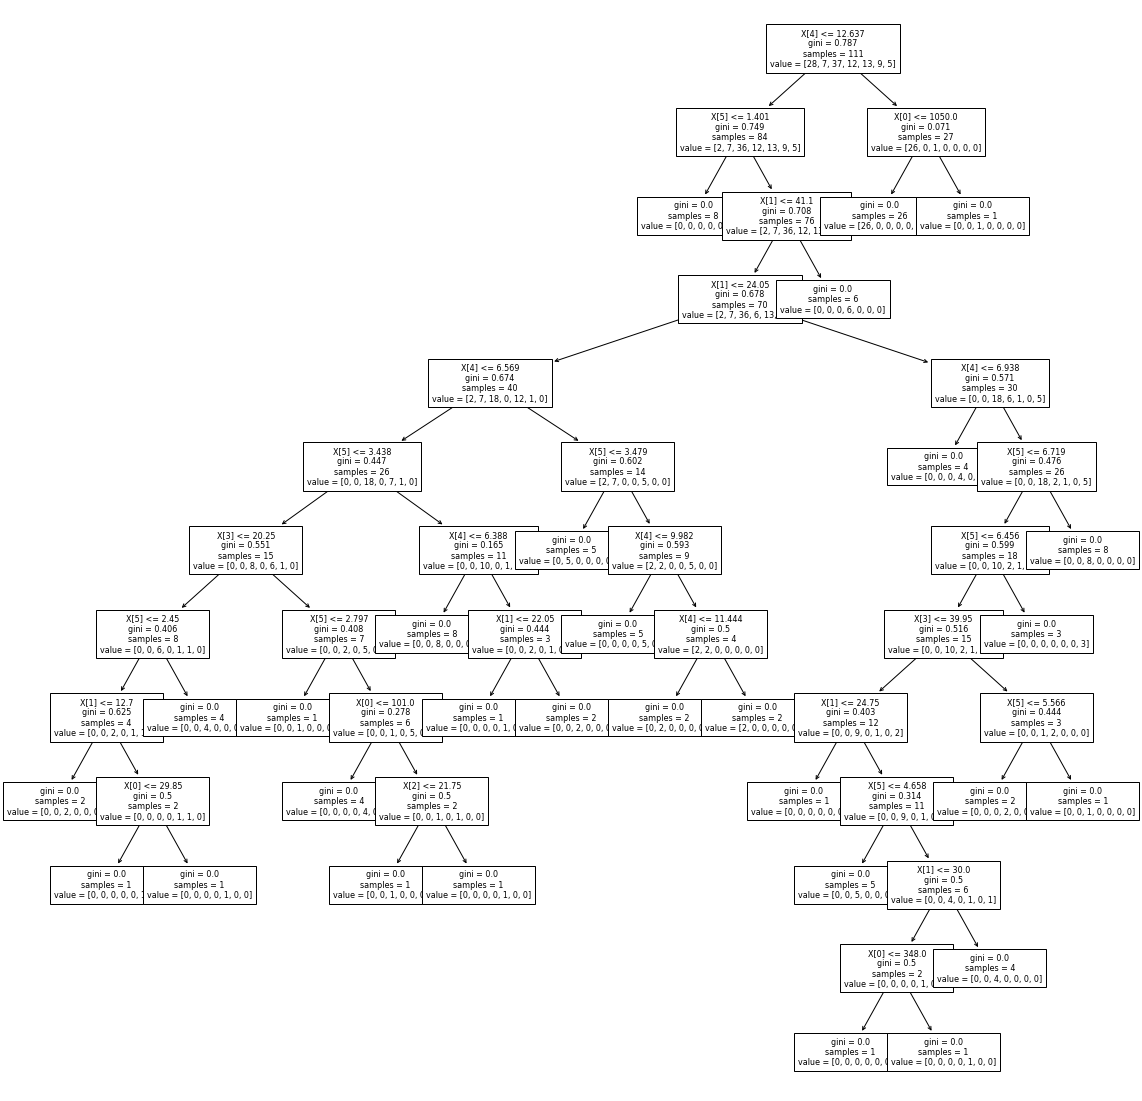

In [8]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,20)) # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=8)
plt.show()

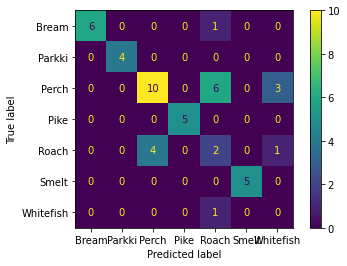

In [9]:
# Matrice de confusion pour calcul des scores

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf.predict(x_test)
confusion_matrix = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=clf.classes_)
disp.plot();

In [10]:
# Taux de bien classé

import numpy as np
np.diag(confusion_matrix).sum() / confusion_matrix.sum() # 66.66%

0.6666666666666666

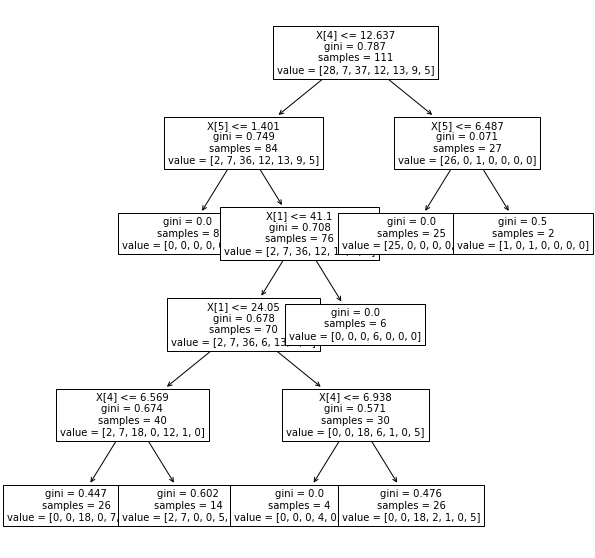

In [11]:
# Regarder l'aides des fonctions DecisionTreeClassifier et DecisionTreeRegressor, jouer avec les 
# principaux paramètres et regarder l'influence de chacun sur les arbres et les scores.
    # Paramètres principaux :
    # max_depth
    # min_samples_split
    # min_samples_leaf

clf1 = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=3, min_samples_leaf=2)
clf1.fit(x_train, y_train)
plt.figure(figsize=(10,10)) # set plot size (denoted in inches)
tree.plot_tree(clf1, fontsize=10)
plt.show()

In [17]:
# GridSearchCV pour trouver les meilleurs paramètres

from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {'max_depth': np.arange(1, 10), 'min_samples_leaf': np.arange(1, 10)}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid.fit(x_train, y_train)

print('Grid.best_score:', grid.best_score_)
print('Grid.best_params:', grid.best_params_)

model = grid.best_estimator_
print('Test score', model.score(x_test, y_test))

Grid.best_score: 0.7209486166007906
Grid.best_params: {'max_depth': 9, 'min_samples_leaf': 4}
Test score 0.7083333333333334


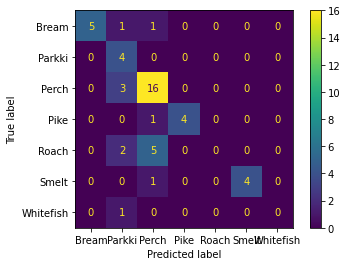

In [141]:
# Matrice de confusion pour calcul des scores

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf1.predict(x_test)
confusion_matrix = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=clf1.classes_)
disp.plot();

In [142]:
# Taux de bien classé

np.diag(confusion_matrix).sum() / confusion_matrix.sum() # 68.75%

0.6875

# Forêts (pas de représentation possible) <a class="anchor" id="for"></a>

In [143]:
# Remplacer les arbres de décision de l'exercices précédent par des forêts.

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

forest_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

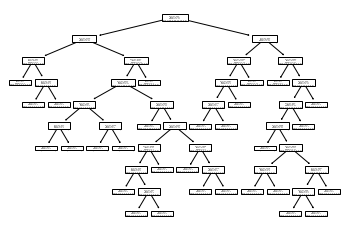

In [107]:
# Plot de l'un des estimateurs (un des arbres de la forêt) => ne sert à rien pour démontrer une fôret car chaque arbre sera
# complètement différent

estimators = forest_clf.estimators_[9]
plot_tree(estimators);

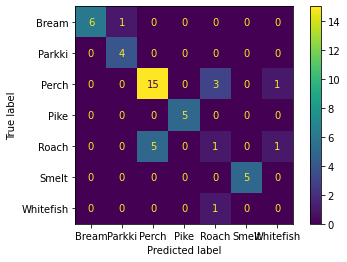

In [144]:
# Matrice de confusion pour calcul des scores

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = forest_clf.predict(x_test)
confusion_matrix = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=forest_clf.classes_)
disp.plot();

In [145]:
# Taux de bien classé
import numpy as np
np.diag(confusion_matrix).sum() / confusion_matrix.sum() # 75%

0.75

In [146]:
# Faire varier les paramètres en regardant l'aide de la fonction.
    # max_depth : La profondeur maximale de l'arbre. Si None, les nœuds sont développés jusqu'à ce que toutes les feuilles soient pures ou jusqu'à ce que toutes les feuilles contiennent 
        # moins que les échantillons min_samples_split.
    # n_estimators : The number of trees in the forest.
    # criterion : mse, mae pour RandomForestRegressor gini, entropy pour RandomForestClassifior.
    # min_samples_split : Le nombre minimum d'individus requis pour diviser un nœud interne.

from sklearn.ensemble import RandomForestClassifier
forest_clf2 = RandomForestClassifier(n_estimators=10, max_depth=5, criterion="entropy", min_samples_split=4)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

forest_clf2.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=4,
                       n_estimators=10)

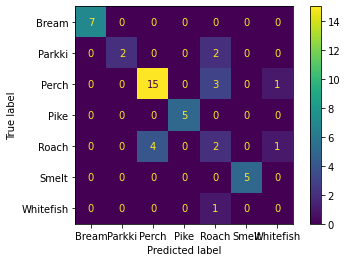

In [147]:
# Matrice de confusion pour calcul des scores

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = forest_clf2.predict(x_test)
confusion_matrix = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=forest_clf2.classes_)
disp.plot();

In [132]:
# Taux de bien classé
np.diag(confusion_matrix).sum() / confusion_matrix.sum() # 68.75%

0.6875

# SVC (pas de représentation possible) <a class="anchor" id="svc"></a>

In [148]:
# Exercice même chose que les forêts mais utiliser from sklearn.svm import SVC.

from sklearn.svm import SVC
fish_svc = SVC()


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

fish_svc.fit(x_train, y_train)

SVC()

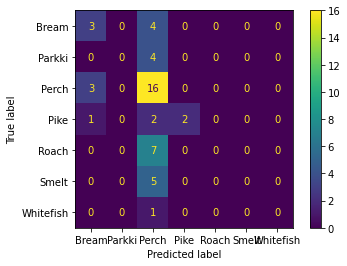

In [149]:
# Matrice de confusion pour calcul des scores

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = fish_svc.predict(x_test)
confusion_matrix = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=fish_svc.classes_)
disp.plot();

In [151]:
# Taux de bien classé
np.diag(confusion_matrix).sum() / confusion_matrix.sum() # 43.75%

0.4375

In [152]:
# Faire varier :
    # kernel : Spécifie le type de noyau à utiliser dans l'algorithme. Il doit s’agir de "linear", "poly", "rbf", "sigmoid", "precomputed" ou fonction appelable.
    # degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

from sklearn.svm import SVC
fish_svc1 = SVC(kernel="poly", degree=15)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

fish_svc1.fit(x_train, y_train)

SVC(degree=15, kernel='poly')

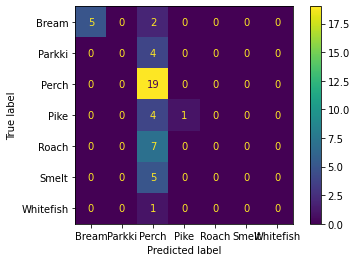

In [154]:
# Matrice de confusion pour calcul des scores

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = fish_svc1.predict(x_test)
confusion_matrix = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=fish_svc1.classes_)
disp.plot();

In [155]:
# Taux de bien classé
np.diag(confusion_matrix).sum() / confusion_matrix.sum() # 52.08%

0.5208333333333334

# Gradient Boosting <a class="anchor" id="gb"></a>

In [76]:
# Exercice même chose que les forêts mais utiliser from sklearn.ensemble import GradientBoostingRegressor.

from sklearn.ensemble import GradientBoostingClassifier
fish_grad = GradientBoostingClassifier()


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

fish_grad.fit(x_train, y_train)

GradientBoostingClassifier()

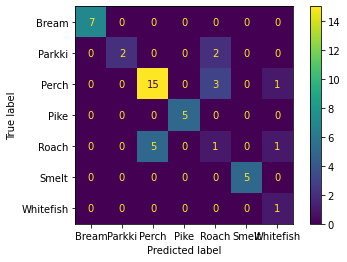

In [156]:
# Matrice de confusion pour calcul des scores

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = fish_grad.predict(x_test)
confusion_matrix = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=fish_grad.classes_)
disp.plot();

In [157]:
# Taux de bien classé
np.diag(confusion_matrix).sum() / confusion_matrix.sum() # 75%

0.75

In [83]:
# Faire varier :
    # loss ls, lad, huber, quantile.
    # learning_rate le taux d'apprentissage réduit la contribution de chaque arbre par learning_rate. Il y a un compromis 
    # entre learning_rate et n_estimators.
    # n_estimators Le nombre d'étapes de boost à effectuer. L'amplification du gradient est assez robuste à sur-ajustée, 
        # donc un grand nombre entraîne généralement de meilleures performances.
    # subsample La fraction d'échantillons à utiliser pour adapter les apprenants de base individuels. Si elle est inférieure 
        # à 1,0, cela entraîne un renforcement du gradient stochastique.
    # criterion friedman_mse, mse, mae. La fonction pour mesurer la qualité d'un split. Les critères pris en charge 
        # sont «friedman_mse» pour l'erreur quadratique moyenne avec un score d'amélioration de Friedman, «mse» pour l'erreur 
        # quadratique moyenne et «mae» pour l'erreur absolue moyenne. La valeur par défaut de "friedman_mse" est généralement 
        # la meilleure car elle peut fournir une meilleure approximation dans certains cas.
        
        
from sklearn.ensemble import GradientBoostingClassifier
fish_grad = GradientBoostingClassifier(loss= "deviance", learning_rate=0.9, n_estimators=600, subsample=0.9, 
                                      criterion="friedman_mse")


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

fish_grad.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.9, n_estimators=600, subsample=0.9)

In [82]:
# Calculer les scores (Score RMSE si on avait utilisé DecisionTreeRegressor)
from sklearn.metrics import confusion_matrix

predictions = fish_grad.predict(x_test)
confusion_matrix = confusion_matrix(y_test,predictions)
confusion_matrix

# Taux de bien classé
np.diag(confusion_matrix).sum() / confusion_matrix.sum() # 77%

0.7708333333333334

In [79]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special